# Explore here

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

ds= pd.read_csv("/workspaces/Finarosalina_proyecto_EDA/data/raw/AB_NYC_2019.csv")

# ds.info()  revisamos numero de filas y columnas y valores nulos y tipología de forma general
# ds.describe()

# transformar host_id a object type para evitar posibles problemas ya que no se va a tratar como un valor para hacer operaciones:

ds['host_id'] = ds['host_id'].astype(object)

# revisar si hay valores repetidos. No hay por ID :np.int64(0)
ds.drop("host_id", axis = 1).duplicated().sum()

# eliminar col que no aportan valor:
# host_name, name ya que no es el nombre completo, ademas hay nombres repetidos sin relación y no aportan valor al estudio de precio
# last_review 38843 non-null  object los datos son  incompletos y al representarlos no aportan valor
# reviews_per_month 38843 non-null  float64 los datos son incompletos y al represntarlos no aportan valor
# Id no aporta información a la varación de precio y ya puedo identificar por host_id
# latitude y longitude, no aportan valor porque ya sé pueden ubicar por neighbourhood 
# Eliminar columnas que no aportan valor
cols_to_drop = ['host_name', 'name', 'last_review', 'reviews_per_month', 'id', 'latitude', 'longitude']
ds = ds.drop(columns=cols_to_drop)

print(ds.columns)


ds.info()

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   host_id                         48895 non-null  object
 1   neighbourhood_group             48895 non-null  object
 2   neighbourhood                   48895 non-null  object
 3   room_type                       48895 non-null  object
 4   price                           48895 non-null  int64 
 5   minimum_nights                  48895 non-null  int64 
 6   number_of_reviews               48895 non-null  int64 
 7   calculated_host_listings_count  48895 non-null  int64 
 8   availability_365                48895 non-null  int64 
dtypes: int64(5), obje

In [2]:
# Limpiar texto:
def clean_text(text):
    if isinstance(text, str):  # Verifica si el valor es de tipo string
        text = text.strip().lower()  # Convertir a minúsculas y eliminar espacios extra
        text = ''.join(e for e in text if e.isalnum() or e.isspace())  # Eliminar caracteres no alfabéticos (excepto espacio)
    return text

# Aplicar la función clean_text solo a las columnas de tipo 'object' (texto)
ds[ds.select_dtypes(include=["object"]).columns] = ds.select_dtypes(include=["object"]).applymap(clean_text)

/tmp/ipykernel_607/241358818.py:9: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  ds[ds.select_dtypes(include=["object"]).columns] = ds.select_dtypes(include=["object"]).applymap(clean_text)


neighbourhood_group  room_type     
bronx                entire homeapt    125.320955
                     private room       63.070769
                     shared room        59.800000
brooklyn             entire homeapt    167.616253
                     private room       72.550228
                     shared room        50.410194
manhattan            entire homeapt    222.758927
                     private room      109.041514
                     shared room        87.718220
queens               entire homeapt    141.169866
                     private room       68.240202
                     shared room        49.312821
staten island        entire homeapt    135.156977
                     private room       62.292553
                     shared room        57.444444
Name: price, dtype: float64


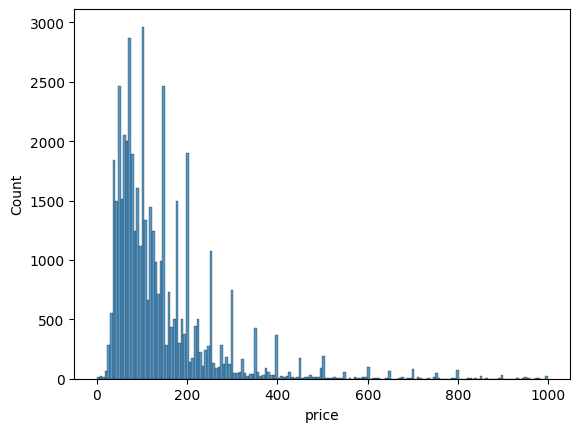

In [3]:
### Antes de iniciar con el analisis, reviso los outliers del atributo objetivo.

#tras revisar la columna "price" y ver outliers por encima de 1500€ limito. Lo mismo con noches minimas. 
# sns.boxplot(data=ds, x="price")

df = ds[(ds['price'] < 1000) & (ds['minimum_nights'] < 100)]

sns.histplot(data=df, x="price")

# compruebo precios medios relaes por zona, teniendo en cuenta las tipologías de alojamiento
precio_medio= df.groupby(by=["neighbourhood_group", "room_type"])["price"].mean()
print(precio_medio)






 Variables categóricas: room_type, neighbourhood_group y neighbourhood		

/tmp/ipykernel_608/1399035650.py:6: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Neighbourhood Groups', loc='upper right')


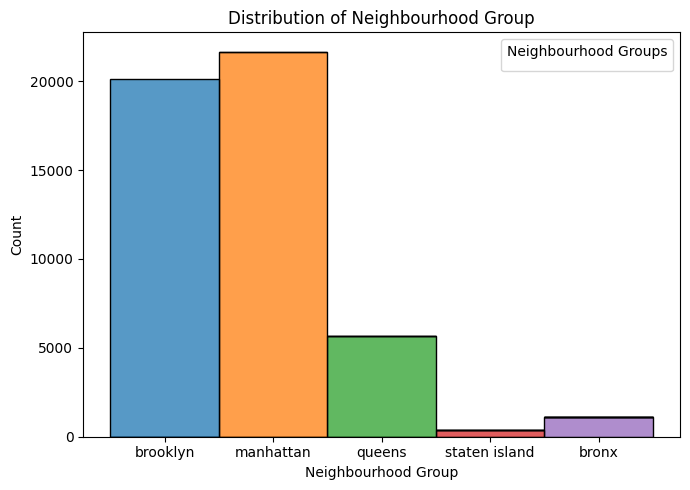

/home/vscode/.local/lib/python3.11/site-packages/seaborn/distributions.py:267: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  baselines[cols] = curves[cols].shift(1, axis=1).fillna(0)
/tmp/ipykernel_608/1399035650.py:16: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Neighbourhood', loc='upper right')  # Adjust legend position if needed


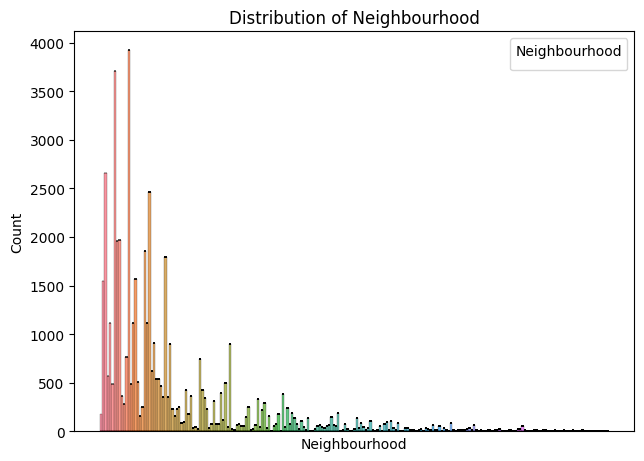

In [46]:

plt.figure(figsize=(7, 5))  # Necesito ver mejor las categóricas para que no se superpongan valores
sns.histplot(data=ds, x="neighbourhood_group", hue="neighbourhood_group", multiple="stack", legend=True)
plt.xlabel('Neighbourhood Group')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood Group')
plt.legend(title='Neighbourhood Groups', loc='upper right') 
plt.tight_layout()
plt.show()

plt.figure(figsize=(7, 5))  # Necesito ver mejor las categóricas para que no se superpongan valores
sns.histplot(data=ds, x="neighbourhood", hue="neighbourhood", multiple="stack", legend=True)
plt.xticks([])
plt.xlabel('Neighbourhood')
plt.ylabel('Count')
plt.title('Distribution of Neighbourhood')
plt.legend(title='Neighbourhood', loc='upper right')  # Adjust legend position if needed
# Ajuste manual de los márgenes
plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)
plt.show()




La distribicion muestral no es normal, hay zonas como Brooklin y Manhattan que cuentan con muchos mas registros que el resto. Neighbourhood, la mayor parte de valores está concentrada en una zona pequeña y el resto apenas es significativo.


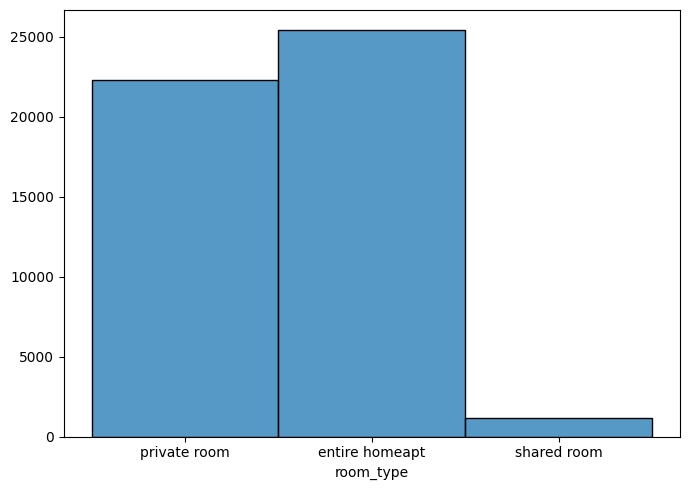

In [47]:
plt.figure(figsize=(7, 5)) 
sns.histplot( data = ds, x = "room_type").set(ylabel = None)
plt.tight_layout()

plt.show()




Las preferencias a la hora de escoger habitación son claras, o se decanta por un apartamento ( mas de 500 registros) o por habitaciones privadas(sobre 450). A penas hay registros de habitaciones compartidas.

Variables numericas: host_id, price, minimum_nights, number_of_reviews, calculated_host_listings_count, availability_365

availability_365 la considero numérica porque a pesar de no tomar valores infinitos, no todos sus valroes son iguales, ya que tener mucha disponibilidad es peor, y en teoría debería hacer que el precio bajase, además no representan ninguna categoría.


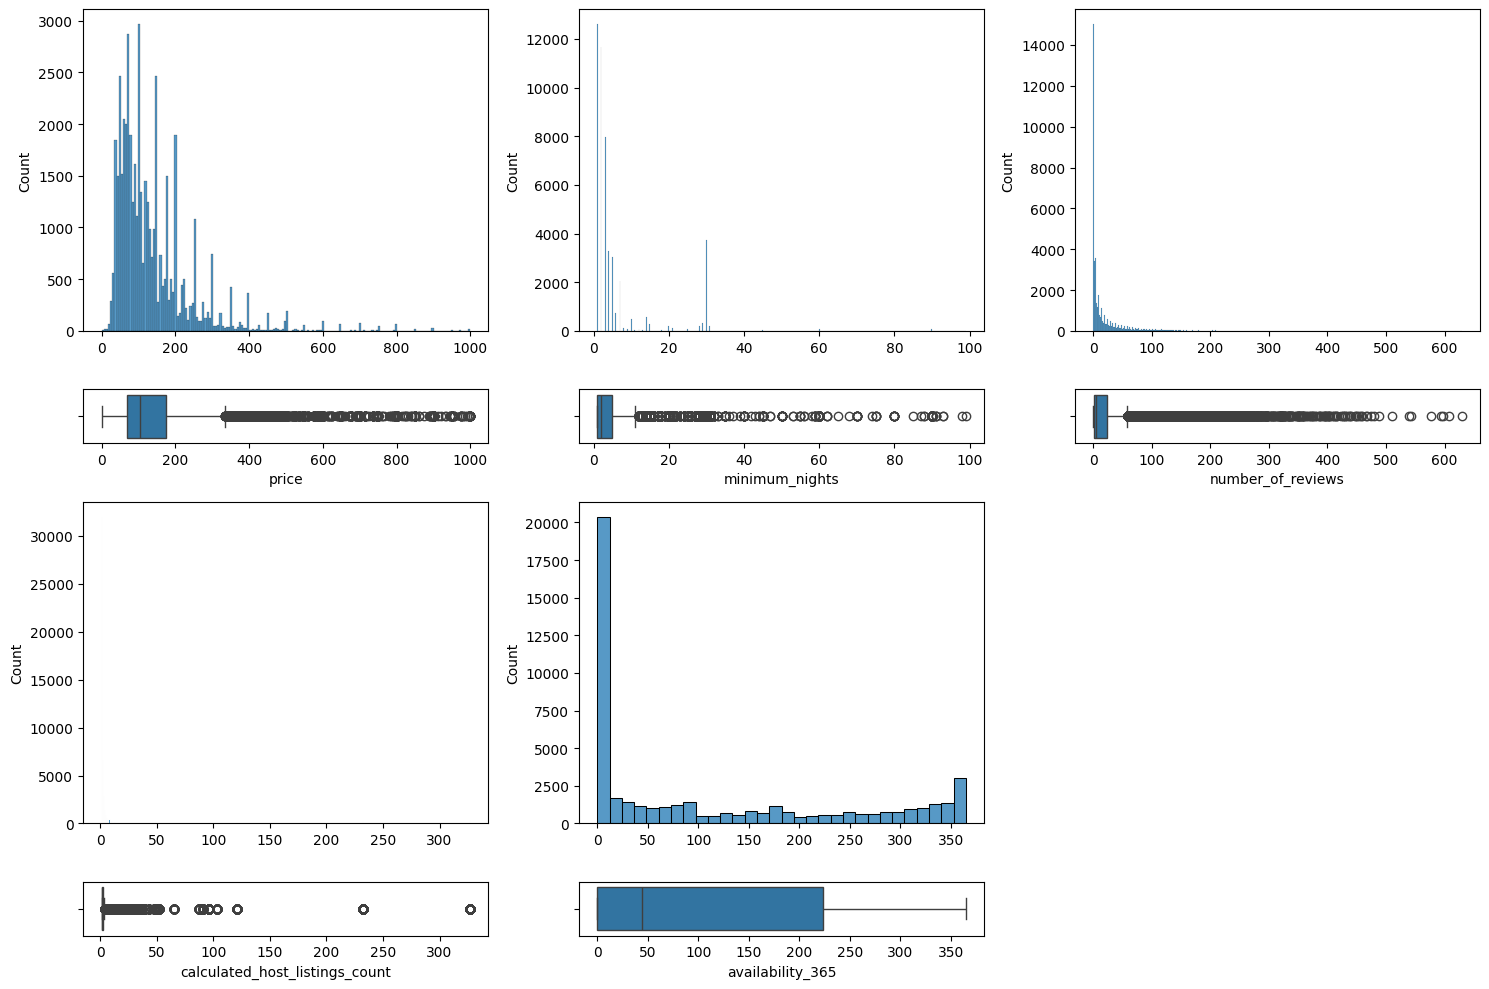

In [10]:
fig, axis = plt.subplots(4, 3, figsize=(15, 10), gridspec_kw={'height_ratios': [6, 1, 6, 1]})

sns.histplot(ax = axis[0, 0], data = df, x = "price").set(xlabel = None)
sns.boxplot(ax = axis[1, 0], data = df, x = "price")

sns.histplot(ax = axis[0, 1], data = df, x = "minimum_nights").set(xlabel = None)
sns.boxplot(ax = axis[1, 1], data = df, x = "minimum_nights")

sns.histplot(ax = axis[0, 2], data = df, x = "number_of_reviews").set(xlabel = None)
sns.boxplot(ax = axis[1, 2], data = df, x = "number_of_reviews")

sns.histplot(ax = axis[2, 0], data = df, x = "calculated_host_listings_count").set(xlabel = None)
sns.boxplot(ax = axis[3, 0], data = df, x = "calculated_host_listings_count")

sns.histplot(ax = axis[2, 1], data = df, x = "availability_365").set(xlabel = None)
sns.boxplot(ax = axis[3, 1], data = df, x = "availability_365")

# Eliminar las posiciones vacías 
fig.delaxes(axis[2, 2])
fig.delaxes(axis[3, 2])

plt.tight_layout()
plt.show()


Cabe destacar los outlayers de número de alojamientos para un mismo host, si el dato no es un error, existen varios grandes tenerdores que tienen una gran cantidad de inmubles, más de 300 en algún caso. Estos podrían ser responsables de crear tendencias en em mercado y limitar la competitividad de los pequeños. Tambien desplazar de sus viviendas a  grupos sociales con menores recursos.

Sorprende la reprende la representación de la disponibilidad, es francamente baja para la mayoría de establecimientos, con medias inferiores a 50 días libres por año. Si bien es cierto que en un número menor de establecimientos si existe una mayor disponibilidad. En el resto de atribituos se aprecian outlayers, siendo en "número de noches" especialmetne significativo,superando las 1000 noches el ciertos casos, lo que indica que o bien los datos son erróneos (habría que revisar) o bien en ciertos casos se emplean como vivienda habitual.

** Análisis de variables multivariante **

<Axes: xlabel='neighbourhood_group', ylabel='price'>

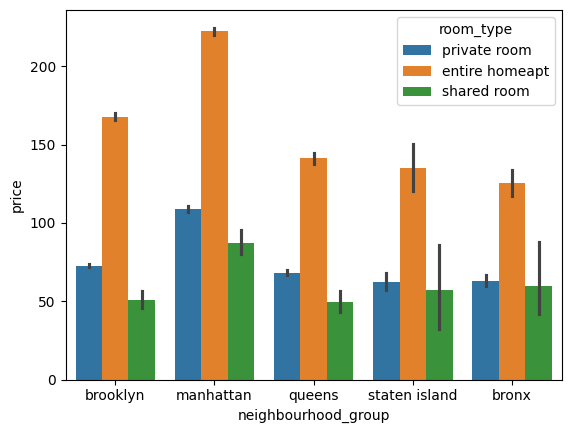

In [6]:
sns.barplot(data=df, x = 'neighbourhood_group', y= 'price', hue="room_type")

In [11]:
df.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

<Axes: xlabel='number_of_reviews', ylabel='price'>

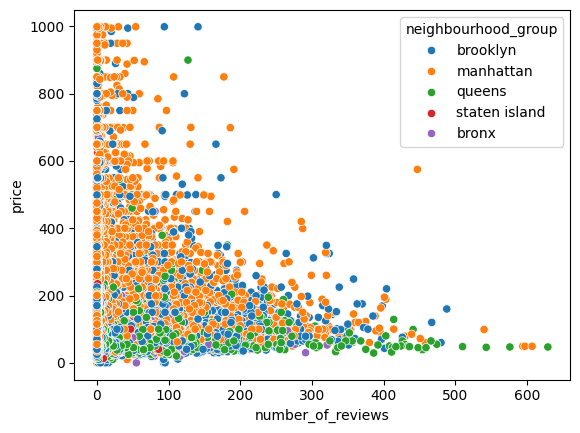

In [12]:
sns.scatterplot(data=df, x='number_of_reviews', y= 'price', hue="neighbourhood_group" )

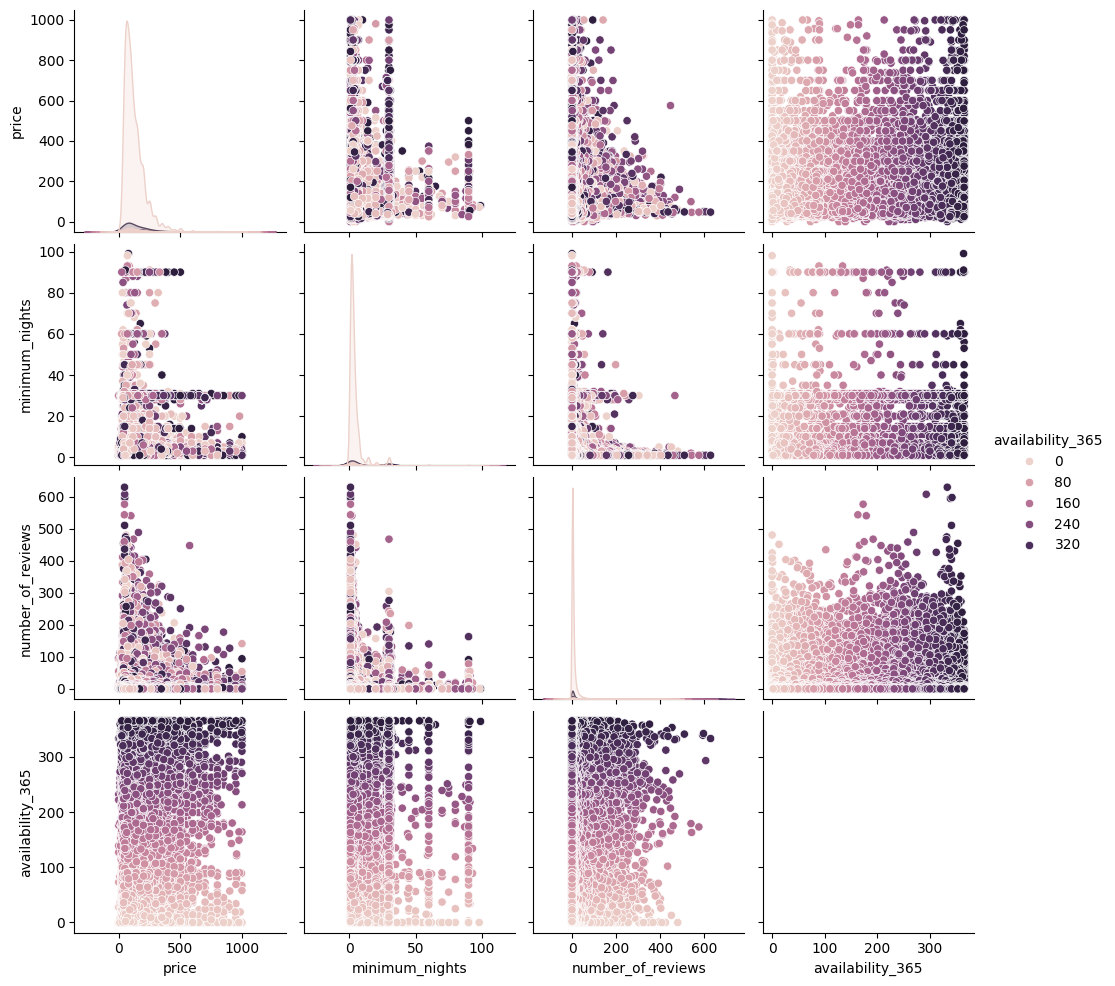

In [13]:
sns.pairplot(data=df, vars=['price', 'minimum_nights', 'number_of_reviews', 'availability_365'], hue='availability_365')

Aquí se aprecia la dependencia del numero de comentarios y la ubucaión con el precio. La mayor cantidad de comentarios se concentran en estancias con precios por debajo del los 500€

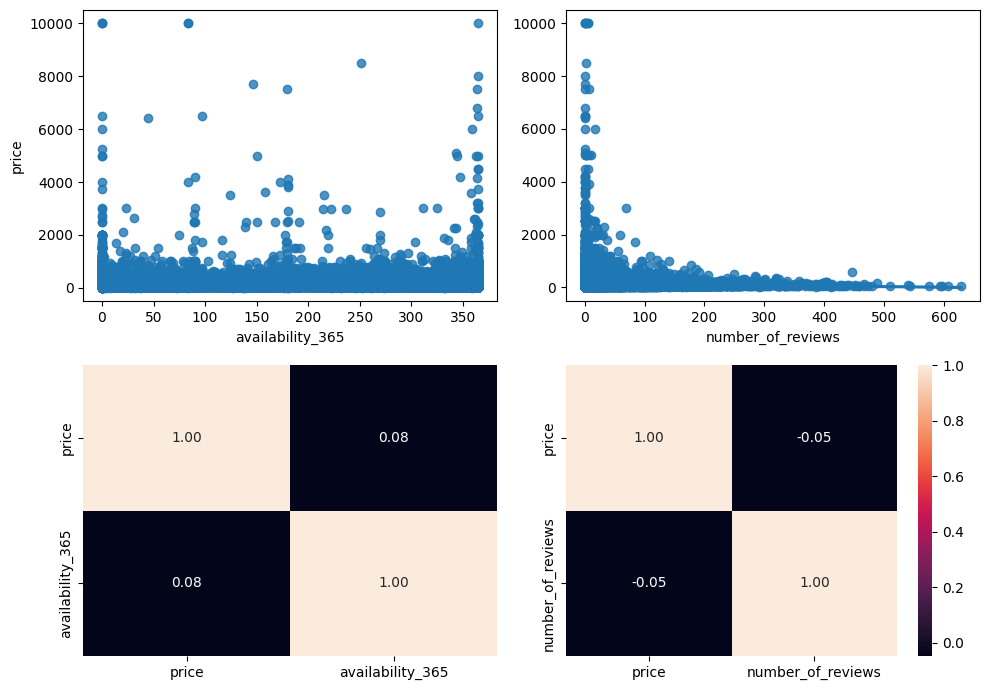

In [ ]:
 # Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds, x = "availability_365", y = "price")
sns.heatmap(ds[["price", "availability_365"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds, x = "number_of_reviews", y = "price").set(ylabel=None)
sns.heatmap(ds[["price", "number_of_reviews"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

No se aprecia relación de depencia, ni positiva ni negativa entre número de comentarios y disponibilidad con el precio.

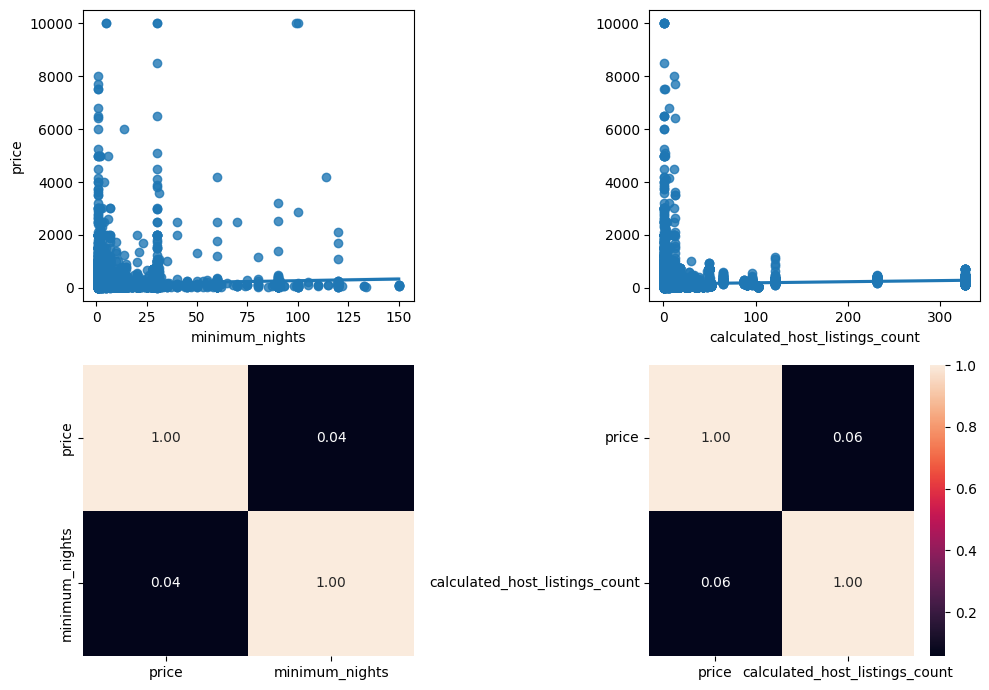

In [ ]:
 # Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Filtrar los datos donde 'minimum_nights' sea menor o igual a 150 tras ver boxplot, para poder observar mejor
ds_filtrado = ds[ds['minimum_nights'] <= 150]

# Crear un gráfico de dispersión con los datos filtrados
sns.regplot(ax=axis[0, 0], data=ds_filtrado, x="minimum_nights", y="price")

sns.heatmap(ds[["price", "minimum_nights"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)
sns.regplot(ax = axis[0, 1], data = ds, x = "calculated_host_listings_count", y = "price").set(ylabel=None)
sns.heatmap(ds[["price", "calculated_host_listings_count"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()

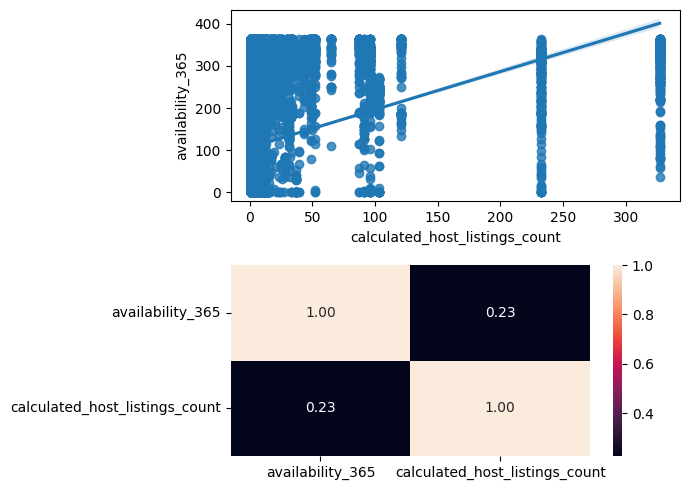

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear una figura con subgráficos (aquí tenemos una sola fila y columna)
fig, axis = plt.subplots(2, 1, figsize=(7, 5))

# Primer gráfico: Regplot entre calculated_host_listings_count y availability_365
sns.regplot(data=ds, x="calculated_host_listings_count", y="availability_365", ax=axis[0]).set(ylabel="availability_365")

# Segundo gráfico: Mapa de calor de la correlación entre las dos variables
sns.heatmap(ds[["availability_365", "calculated_host_listings_count"]].corr(), annot=True, fmt=".2f", ax=axis[1])

# Ajustar el layout
plt.tight_layout()

# Mostrar el gráfico
plt.show()


Parece que sí existe una relación directa entre el número de propiedades y la disponibilidad, a mayor número de propiedads, mayor oferta los 365 días del año, vamos como un hotel.

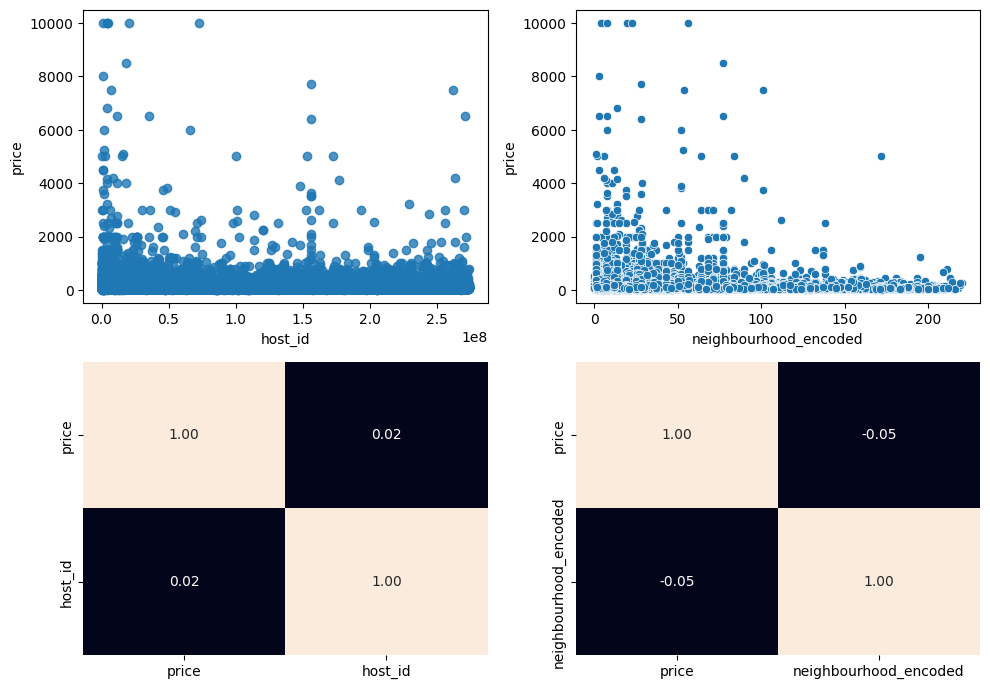

In [ ]:
# Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Convertir la columna 'neighbourhood_group' a valores numéricos
ds['neighbourhood_encoded'] = pd.factorize(ds['neighbourhood'])[0]

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds, x = "host_id", y = "price")
sns.heatmap(ds[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Usar la columna 'neighbourhood_group_encoded' para calcular la correlación
sns.heatmap(ds[["price", "neighbourhood_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)


sns.scatterplot(ax=axis[0, 1], data=ds, x="neighbourhood_encoded", y="price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


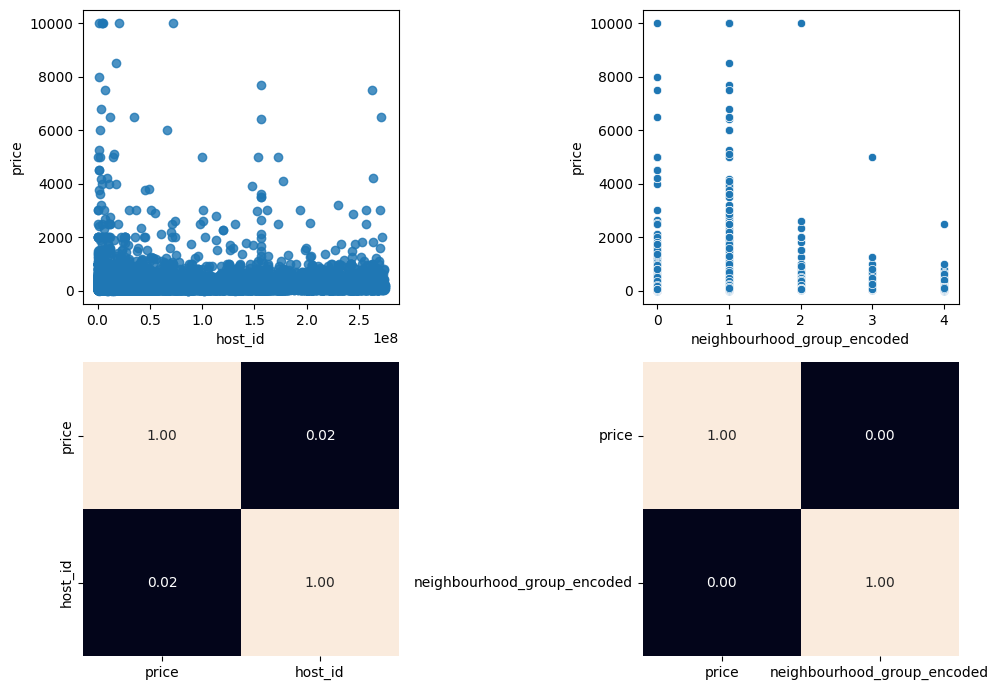

In [ ]:
# Análisis de variables multivariante
fig, axis = plt.subplots(2, 2, figsize = (10, 7))

# Convertir la columna 'neighbourhood_group' a valores numéricos
ds['neighbourhood_group_encoded'] = pd.factorize(ds['neighbourhood_group'])[0]

# Crear un diagrama de dispersión múltiple
sns.regplot(ax = axis[0, 0], data = ds, x = "host_id", y = "price")
sns.heatmap(ds[["price", "host_id"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 0], cbar = False)

# Usar la columna 'neighbourhood_group_encoded' para calcular la correlación
sns.heatmap(ds[["price", "neighbourhood_group_encoded"]].corr(), annot = True, fmt = ".2f", ax = axis[1, 1], cbar = False)

# Usar un gráfico de dispersión con la columna 'neighbourhood_group_encoded'
sns.scatterplot(ax=axis[0, 1], data=ds, x="neighbourhood_group_encoded", y="price")

# Ajustar el layout
plt.tight_layout()

# Mostrar el plot
plt.show()


  neighbourhood_group  encoded_value
0            Brooklyn              0
1           Manhattan              1
2              Queens              2
3       Staten Island              3
4               Bronx              4

Análisis categórico-categórico

Variables categóricas: room_type, neighbourhood_group

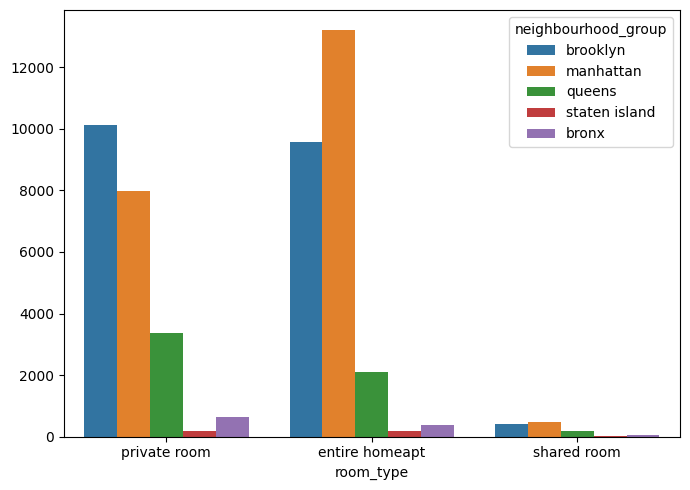

In [ ]:
plt.figure(figsize=(7, 5))

sns.countplot(data=ds, x="room_type", hue="neighbourhood_group").set(ylabel=None)
plt.tight_layout()  
plt.show()


Está claro que hay 2 modelos de negocio, el original, donde la gente alquilaba una habitación suelta de la casa y el puro econmico, donde se alguila en apartamento 365 dias año. Destaca especialmente este modelo en Manhattan, donde imagino habrá mayor demanda turística.

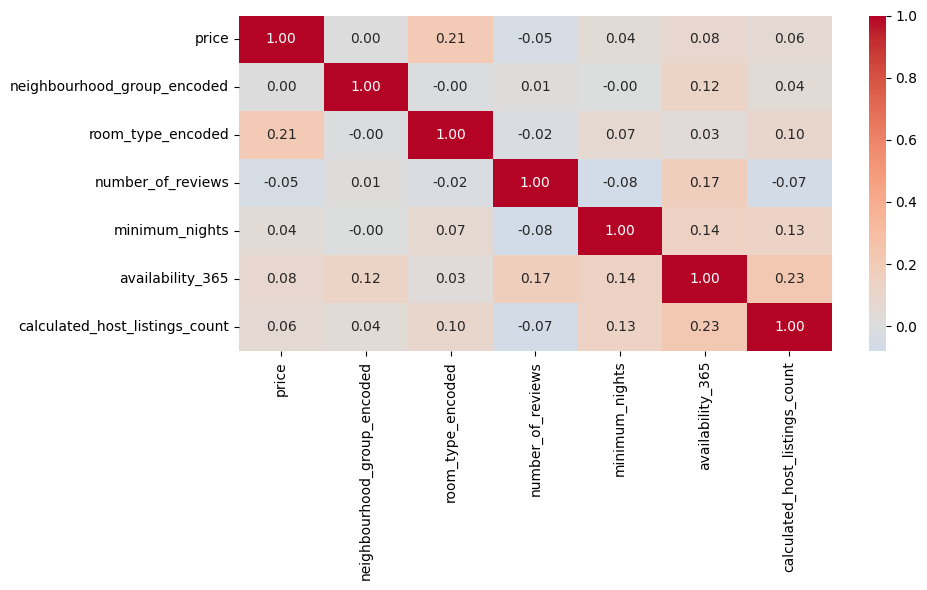

In [ ]:
# Convertir columnas categóricas en valores numéricos
ds["neighbourhood_group_encoded"] = pd.factorize(ds["neighbourhood_group"])[0]
ds["room_type_encoded"] = pd.factorize(ds["room_type"])[0]
ds["neighbourhood_encoded"] = pd.factorize(ds["neighbourhood"])[0]  

# Seleccionar solo las columnas numéricas para el cálculo de la correlación
corr_data = ds[["price","neighbourhood_group_encoded","room_type_encoded","number_of_reviews","minimum_nights","availability_365","calculated_host_listings_count"]]

# Calcular la matriz de correlación
corr_matrix = corr_data.corr()

fig, axis = plt.subplots(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", center=0)

plt.tight_layout()
plt.show()


Se aprecián tendencias lógicas; precio con tipo de habitación. Barrio con localidades. Nº reviews con dispobilidad 365. Más suave ya es la relaciñon entre minimo de noches y dispobilidad.

In [5]:
df.describe()

,host_id,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,4.841900e+04,48419.000000,48419.000000,48419.000000,48419.000000,48419.000000
mean,6.770405e+07,140.230467,6.108718,23.420579,7.170656,111.996055
std,7.862876e+07,112.926056,9.859804,44.672260,33.067499,131.186895
min,2.438000e+03,0.000000,1.000000,0.000000,1.000000,0.000000
25%,7.850015e+06,69.000000,1.000000,1.000000,1.000000,0.000000
50%,3.093371e+07,105.000000,2.000000,5.000000,1.000000,44.000000
75%,1.074344e+08,175.000000,5.000000,24.000000,2.000000,224.000000
max,2.743213e+08,999.000000,99.000000,629.000000,327.000000,365.000000


In [6]:
df.columns

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [8]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

X = df[['host_id', 'neighbourhood_group', 'neighbourhood', 'room_type', 'minimum_nights','number_of_reviews', 'calculated_host_listings_count', 'availability_365']]
y = df['price']

numeric_columns = X.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = ['neighbourhood_group', 'neighbourhood', 'room_type']

# Normalización de las variables numéricas
scaler = StandardScaler()
X[numeric_columns] = scaler.fit_transform(X[numeric_columns])

# Codificación de las columnas categóricas
encoder = LabelEncoder()
for col in categorical_columns:
    X[col] = encoder.fit_transform(X[col])

# Separar el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar las primeras filas de X_train y las formas
print(X_train.head())
print(f"Shape de X_train: {X_train.shape}")
print(f"Shape de X_test: {X_test.shape}")
y.head()

# Guardar los archivos CSV en el directorio 'data/processed'
X_train.to_csv('/workspaces/Finarosalina_proyecto_EDA/data/processed/X_train.csv', index=False)
X_test.to_csv('/workspaces/Finarosalina_proyecto_EDA/data/processed/X_test.csv', index=False)
y_train.to_csv('/workspaces/Finarosalina_proyecto_EDA/data/processed/y_train.csv', index=False)
y_test.to_csv('/workspaces/Finarosalina_proyecto_EDA/data/processed/y_test.csv', index=False)



/tmp/ipykernel_607/4276290470.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[numeric_columns] = scaler.fit_transform(X[numeric_columns])
/tmp/ipykernel_607/4276290470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = encoder.fit_transform(X[col])
/tmp/ipykernel_607/4276290470.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata

        host_id  neighbourhood_group  neighbourhood  room_type  \
13164 -0.215490                    2            127          0   
46252  1.149154                    2            197          0   
7727  -0.790593                    1             28          1   
22998  0.783810                    2            119          0   
44637 -0.212100                    2            201          0   

       minimum_nights  number_of_reviews  calculated_host_listings_count  \
13164        2.423124          -0.501896                        0.720635   
46252       -0.518141          -0.479510                       -0.186610   
7727        -0.416718           2.788771                       -0.065644   
22998       -0.315295          -0.098957                       -0.186610   
44637       -0.315295          -0.524281                       -0.186610   

       availability_365  
13164          0.251582  
46252         -0.243899  
7727           0.000030  
22998         -0.594548  
44637         -0